<a href="https://colab.research.google.com/github/JohenPerera123/Real_World_Project_-for_REPORT/blob/main/Real_World_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mount google drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
file = "/content/drive/MyDrive/student_lifestyle_dataset.csv"

In [ ]:
df = pd.read_csv(file)
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


### Data preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [ ]:
df.isnull().sum()

,0
Student_ID,0
Study_Hours_Per_Day,0
Extracurricular_Hours_Per_Day,0
Sleep_Hours_Per_Day,0
Social_Hours_Per_Day,0
Physical_Activity_Hours_Per_Day,0
GPA,0
Stress_Level,0


In [ ]:
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


### Outlier Detection

I will use the Interquartile Range (IQR) method to detect outliers in the numerical columns of the DataFrame. This method is robust to skewed distributions and is a common approach for outlier identification.

In [ ]:
numcols = df.select_dtypes(include='number')
print(numcols)
q1 = numcols.quantile(0.25)
q3 = numcols.quantile(0.75)
IQR = q3 - q1
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR
outliars = ((numcols< (q1 - 1.5*IQR)) | (numcols> (q3+ 1.5*IQR)))
print("Outliers")
print(df[outliars.any(axis=1)])

      Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0              1                  6.9                            3.8   
1              2                  5.3                            3.5   
2              3                  5.1                            3.9   
3              4                  6.5                            2.1   
4              5                  8.1                            0.6   
...          ...                  ...                            ...   
1995        1996                  6.5                            0.2   
1996        1997                  6.3                            2.8   
1997        1998                  6.2                            0.0   
1998        1999                  8.1                            0.7   
1999        2000                  9.0                            1.7   

      Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
0                     8.7                   2.8   
1                     8.0        

### Visualizing Distributions with Box Plots

I will now create box plots for each numerical column (`Student_ID`) to visualize their distributions, spread, and the presence of outliers. This provides a quick overview of the data's central tendency and variability.

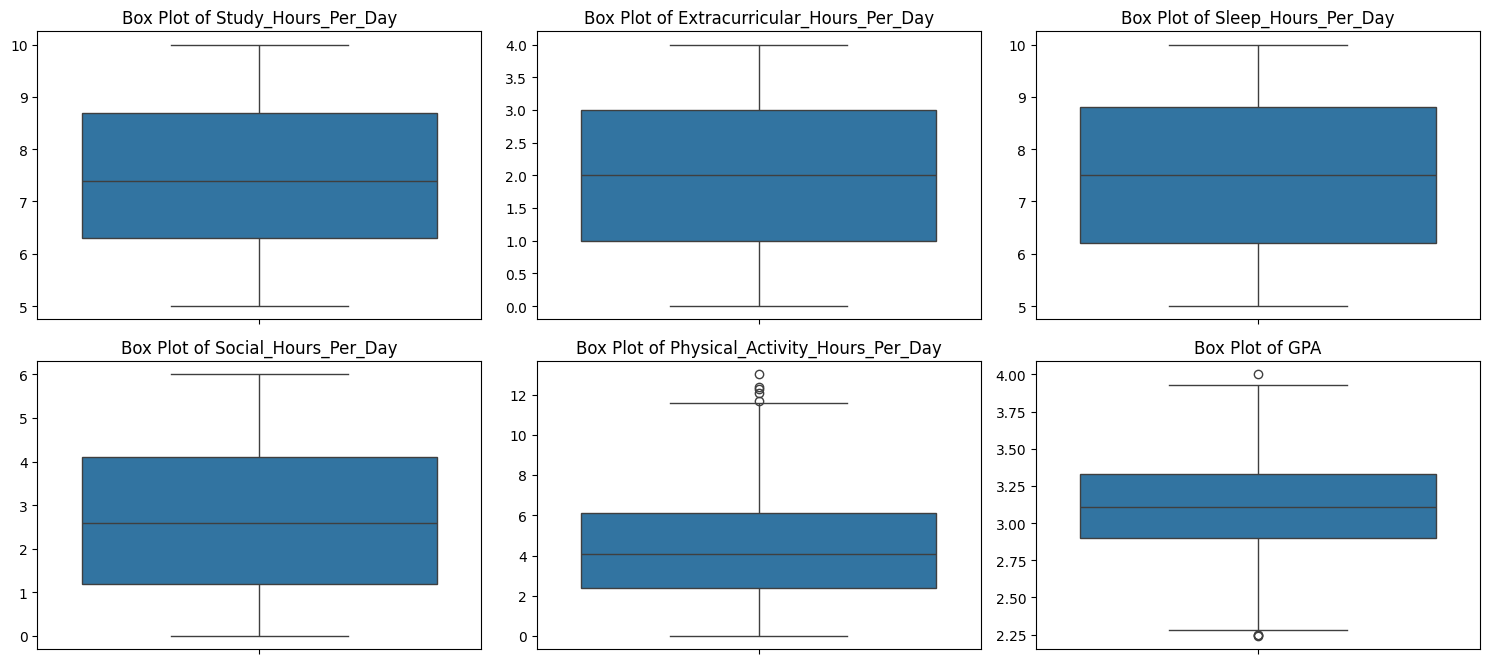

In [ ]:
numerical_cols_to_plot = df.select_dtypes(include=np.number).columns.drop('Student_ID', errors='ignore')

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_to_plot):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('') # Remove y-axis label to avoid clutter
plt.tight_layout()
plt.show()

In [ ]:
df['Physical_Activity_Hours_Per_Day'] = df['Physical_Activity_Hours_Per_Day'].where(df['Physical_Activity_Hours_Per_Day'] <= upper_bound['Physical_Activity_Hours_Per_Day'], upper_bound['Physical_Activity_Hours_Per_Day'])

In [ ]:
print("Outliers")
print(df[outliars.any(axis=1)])

Outliers
      Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
51            52                  9.0                            2.6   
62            63                  5.1                            0.5   
171          172                  5.1                            0.3   
331          332                  5.1                            1.0   
764          765                  5.5                            1.8   
784          785                  5.1                            0.3   
1174        1175                  5.3                            0.3   
1574        1575                  5.3                            2.4   
1715        1716                  5.4                            0.2   

      Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
51                    8.5                   3.1   
62                    5.2                   0.2   
171                   6.0                   0.2   
331                   8.8                   0.8   
764            

In [ ]:
plt.show()

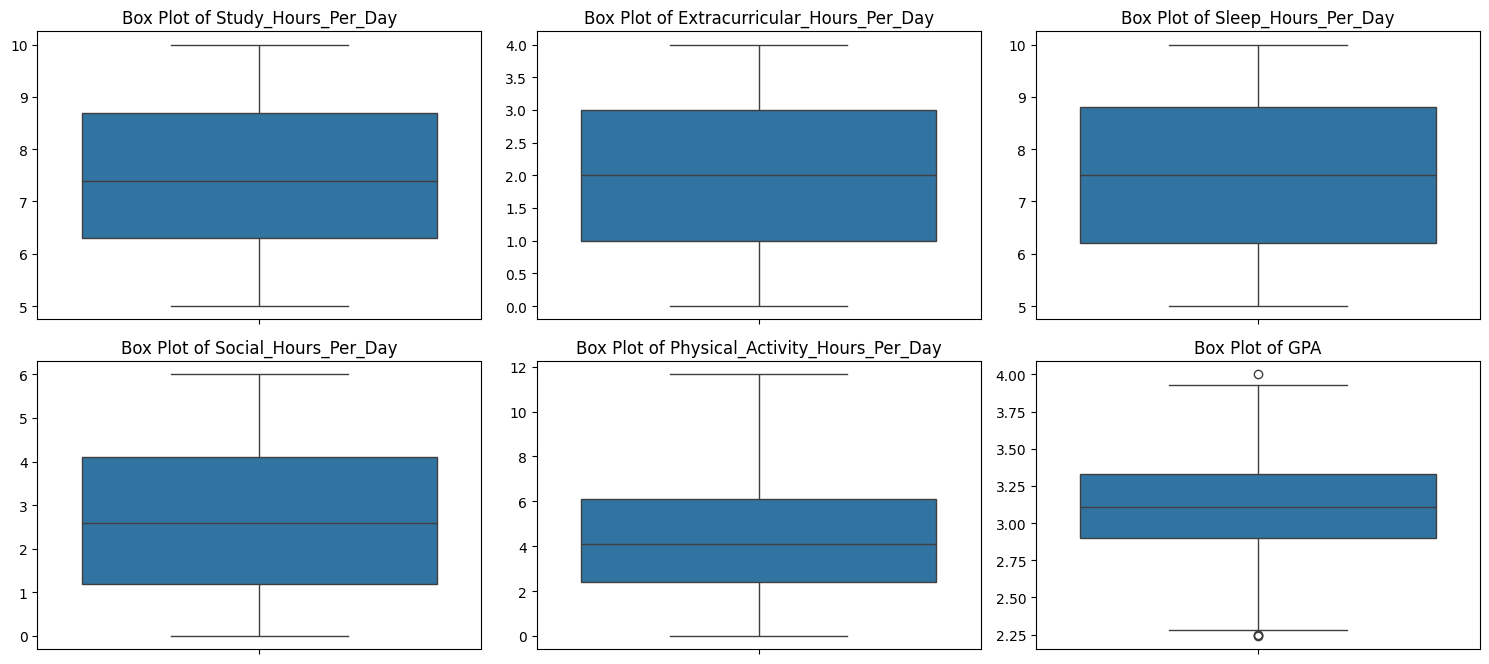

In [ ]:
numerical_cols_to_plot = df.select_dtypes(include=np.number).columns.drop('Student_ID', errors='ignore')

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_to_plot):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('') # Remove y-axis label to avoid clutter
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


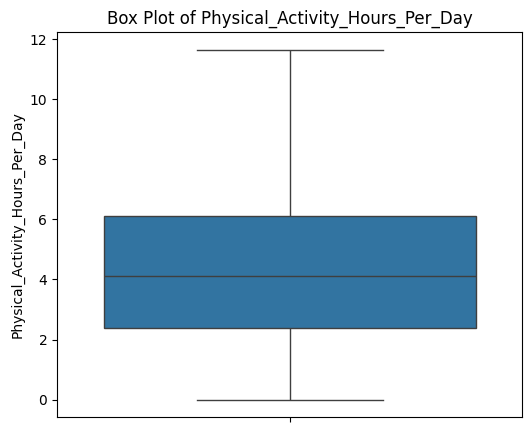

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['Physical_Activity_Hours_Per_Day'])
plt.title('Box Plot of Physical_Activity_Hours_Per_Day')
plt.ylabel('Physical_Activity_Hours_Per_Day')
plt.show()

### Counting Outliers per Attribute

I will now calculate and display the number of outliers for each numerical attribute (excluding 'Student_ID') based on the IQR method.

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.drop('Student_ID', errors='ignore')

print("--- Outlier Counts per Attribute (Excluding Student_ID) ---")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"{col}: {outliers_count} outliers")


--- Outlier Counts per Attribute (Excluding Student_ID) ---
Study_Hours_Per_Day: 0 outliers
Extracurricular_Hours_Per_Day: 0 outliers
Sleep_Hours_Per_Day: 0 outliers
Social_Hours_Per_Day: 0 outliers
Physical_Activity_Hours_Per_Day: 0 outliers
GPA: 4 outliers
